TENSORFLOW MODEL - FER2013 DATASET

IMPORTING LIBRARIES AND DEPENDENCIES

In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout

LOADING THE FER2013 IMAGE DATASET & SETTING IMAGE SIZE, & EMOTION CLASS

In [2]:
# Set the path to the folder containing images
data_path = "C:/Users/HP/Desktop/MSc Thesis/DATASETS/FER2013_complete"

# Define the emotion classes
emotion_classes = ['Angry', 'Disgust', 'Fear', 'Happy',  'Neutral', 'Sad', 'Surprise']

# Set the image size and batch size
image_size = (48, 48)
batch_size = 32

DATA PREPROCESSING

In [3]:
# Load the images and labels
def load_data():
    images = []
    labels = []
    for emotion_class in emotion_classes:
        class_path = os.path.join(data_path, emotion_class)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = Image.open(image_path).convert('L')  # Convert the images to grayscale
            image = image.resize(image_size)
            images.append(np.array(image))
            labels.append(emotion_classes.index(emotion_class))
    return np.array(images), np.array(labels)

images, labels = load_data()

# Split the data into training, validation and testing sets
X_temp, X_test, y_temp, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Reshape the data for CNN input
X_train = X_train.reshape(X_train.shape[0], image_size[0], image_size[1], 1)
X_val = X_val.reshape(X_val.shape[0], image_size[0], image_size[1], 1)
X_test = X_test.reshape(X_test.shape[0], image_size[0], image_size[1], 1)

# Normalize the pixel values between 0 and 1
X_train = X_train.astype('float32') / 255
X_val = X_val.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Convert the labels to one-hot encoding
num_classes = len(emotion_classes)
y_train = np.eye(num_classes)[y_train]
y_val = np.eye(num_classes)[y_val]
y_test = np.eye(num_classes)[y_test]


TENSORFLOW MODEL TRAINING WITH HYPERPARAMETER TUNING - FER2013

In [ ]:
# Importing some libraries and dependencies
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
import psutil

# Function to convert bytes to megabytes
def bytes_to_megabytes(bytes):
    return bytes / (1024.0 ** 2)

# Initial RAM usage
initial_memory = psutil.virtual_memory().used
print(f"Initial RAM used: {bytes_to_megabytes(initial_memory):.2f} MB")

# Creating the CNN model
def create_model():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25)) 

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25)) 

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create the model
model = KerasClassifier(build_fn=create_model, verbose=1)

# RAM usage after model creation
after_creation_memory = psutil.virtual_memory().used
print(f"RAM used after model creation: {bytes_to_megabytes(after_creation_memory):.2f} MB")
print(f"Approximate RAM used during model creation: {bytes_to_megabytes(after_creation_memory - initial_memory):.2f} MB")

# Perform hyperparameter tuning using grid search
param_grid = {'batch_size': [32],
              'epochs': [20]}
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Print the best parameters found
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Retrain the model with the best parameters identified & capture history
model = create_model()
history = model.fit(X_train, y_train, epochs=grid_result.best_params_['epochs'], 
                    batch_size=grid_result.best_params_['batch_size'], validation_data=(X_val, y_val), verbose=1)

# RAM usage after training
after_training_memory = psutil.virtual_memory().used
print(f"RAM used after model training: {bytes_to_megabytes(after_training_memory):.2f} MB")
print(f"Approximate RAM used during training: {bytes_to_megabytes(after_training_memory - after_creation_memory):.2f} MB")

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print("Test accuracy:", test_acc)

TENSORFLOW MODEL TRAINING WITHOUT HYPERPARAMETER TUNING - FER2013

In [ ]:
# Importing some libraries and dependencies
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
import psutil

# Function to convert bytes to megabytes
def bytes_to_megabytes(bytes):
    return bytes / (1024.0 ** 2)

# Initial RAM usage
initial_memory = psutil.virtual_memory().used
print(f"Initial RAM used: {bytes_to_megabytes(initial_memory):.2f} MB")

# Creating the CNN model
def create_model():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create the model
model = create_model()

# RAM usage after model creation
after_creation_memory = psutil.virtual_memory().used
print(f"RAM used after model creation: {bytes_to_megabytes(after_creation_memory):.2f} MB")
print(f"Approximate RAM used during model creation: {bytes_to_megabytes(after_creation_memory - initial_memory):.2f} MB")

# Train the model with a fixed set of parameters
epochs = 20
batch_size = 32
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=1)

# RAM usage after training
after_training_memory = psutil.virtual_memory().used
print(f"RAM used after model training: {bytes_to_megabytes(after_training_memory):.2f} MB")
print(f"Approximate RAM used during training: {bytes_to_megabytes(after_training_memory - after_creation_memory):.2f} MB")

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print("Test accuracy:", test_acc)

CREATING A CALLBACK CLASS & PLOTTING ACCURACY vs EPOCH

In [ ]:
from keras.callbacks import Callback

# Define a custom callback to evaluate the model on the test set
class TestCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data
        self.test_acc = []

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        self.test_acc.append(acc)
        print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

def create_model():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))  

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5)) 

    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create the model
model = create_model()

# Create the TestCallback instance
test_callback = TestCallback((X_test, y_test))

# Fit the model and capture history
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), 
                    callbacks=[test_callback], verbose=1)

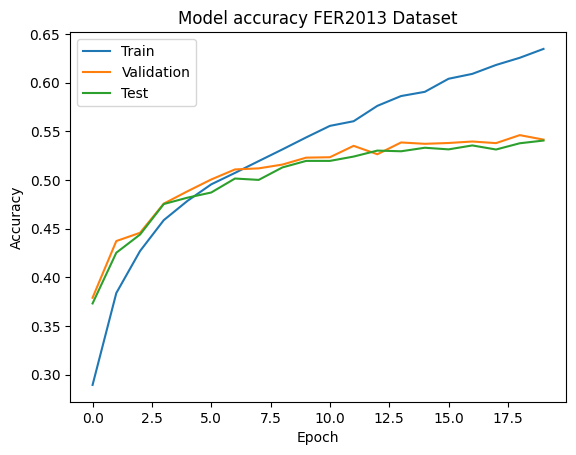

In [6]:
# Plot accuracy vs epochs
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(test_callback.test_acc)  # Plot test accuracy
plt.title('Model accuracy FER2013 Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Test'], loc='upper left')
plt.show()

Error rate vs Epoch Plot

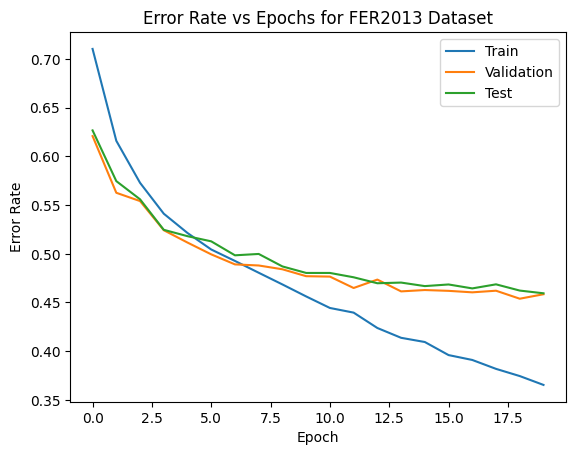

In [7]:
# Plot error rate vs epochs
import matplotlib.pyplot as plt
plt.plot(1 - np.array(history.history['accuracy']))
plt.plot(1 - np.array(history.history['val_accuracy']))
plt.plot(1 - np.array(test_callback.test_acc))  # Plot test error rate
plt.title('Error Rate vs Epochs for FER2013 Dataset')
plt.ylabel('Error Rate')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Test'], loc='upper right')
plt.show()

PRINTING CLASSIFICATION REPORT

In [8]:
# Define the class names for the classification report
class_names = ['Angry', 'Disgust', 'Fear', 'Happy',  'Neutral', 'Sad', 'Surprise']

# Evaluate the model on the test set and print the classification report
y_pred_fer2013 = grid.predict(X_test)
classification_rep = classification_report(np.argmax(y_test, axis=1), y_pred_fer2013, target_names=class_names)
print(classification_rep)

225/225 [==============================] - 10s 45ms/step
              precision    recall  f1-score   support

       Angry       0.46      0.45      0.45      1003
     Disgust       0.85      0.31      0.45       113
        Fear       0.41      0.35      0.38      1034
       Happy       0.73      0.77      0.75      1754
     Neutral       0.48      0.50      0.49      1235
         Sad       0.39      0.44      0.41      1250
    Surprise       0.72      0.67      0.69       789

    accuracy                           0.54      7178
   macro avg       0.58      0.50      0.52      7178
weighted avg       0.55      0.54      0.54      7178



COMPUTING AND PLOTTING THE CONFUSION MATRIX

  3/225 [..............................] - ETA: 10s

225/225 [==============================] - 11s 48ms/step


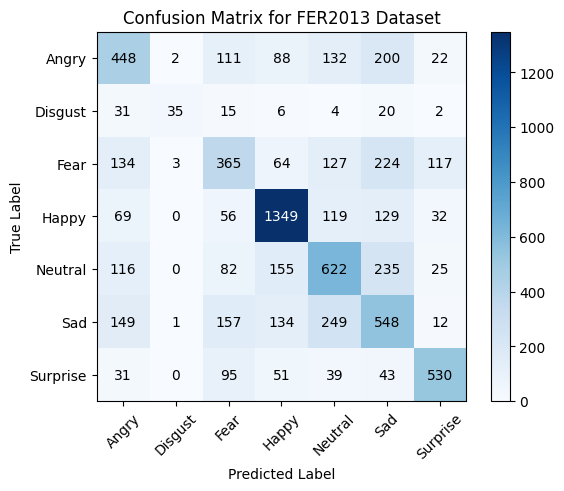

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Compute and plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred_fer2013, classes):
    cm = confusion_matrix(y_true, y_pred_fer2013)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix for FER2013 Dataset")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.show()

# Compute the confusion matrix
y_pred_fer2013 = grid.predict(X_test)
y_true = np.argmax(y_test, axis=1)
plot_confusion_matrix(y_true, y_pred_fer2013, emotion_classes)

COMPUTING AND PLOTTING THE ROC CURVE

In [12]:
# Compute and plot the ROC curve
def plot_roc_curve(y_true, y_pred_fer2013, classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred_fer2013[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred_fer2013.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (area = {0:0.2f})'
                                               ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)
    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                       ''.format(classes[i], roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for FER2013')
    plt.legend(loc="lower right")
    plt.show()

# Compute the probabilities of the positive class for ROC curve
y_pred_fer2013_proba = grid.predict_proba(X_test)

# Plot the ROC curve
plot_roc_curve(y_test, y_pred_fer2013_proba, emotion_classes)

225/225 [==============================] - 11s 47ms/step
